# Mario

# Setup Mario Environment

In [50]:
# Import the joypad wrappers
from nes_py.wrappers import JoypadSpace
# Import the game
import gym_super_mario_bros
# Import the simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [51]:
# Simplfy the movement of Mario using SIMPLE_Movement
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [52]:
# Setup the environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [53]:
# To see what the environment looks like
env.observation_space.shape  # 240 pixels by 256 pixels in 3 colors channels, which represents the frame of the game

(240, 256, 3)

In [54]:
# Randomly test the environment
done = True 
# Loop through 100000 steps (each frame in the game)
for step in range(100):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game
    env.render()
# close the environment
env.close()


# Preprocessing Environment

In [ ]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, SubprocVecEnv, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [ ]:
# Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [ ]:

# Gray-scale and down-sample in order to reduce the computation time for the Reinforcement Learning model
env = GrayScaleObservation(env, keep_dim=True) # Color channels will become 1

In [ ]:
state = env.reset()
state.shape

(240, 256, 1)

So we jump from 240*256*3 = 184320 bits to 240*256*1 = 61440 bits!

TypeError: Invalid shape (240, 256, 12) for image data

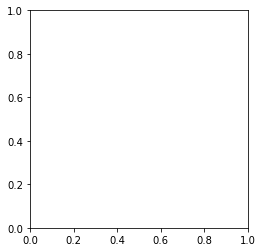

In [ ]:
# warp inside the Dummy Enivornment

env = DummyVecEnv([lambda: env])
plt.imshow(state[0])

In [ ]:

# warp inside the Dummy Enivornment
# Vectorize the environment to run multiple instances of the environment at the same time
import gym

# Create a function to make the environment
def make_env(env_id, rank, seed=0):
    def _init():
        env = gym.make(env_id)
        env.seed(seed + rank)
        return env
    return _init

# Set the number of environments to use
num_envs = 4

# Create the vectorized environment
env = DummyVecEnv([make_env('SuperMarioBros-v0', i) for i in range(num_envs)])



In [ ]:

# Stack frames this will give the agent some kind of memory
env = VecFrameStack(env, n_stack=4, channels_order= 'last') # Stack 4 consecutive frames together to give the agent a sense of motion

In [ ]:
state = env.reset()

In [ ]:
state, reward, done, info = env.step([5])

IndexError: list index out of range

# 